<a href="https://colab.research.google.com/github/shawn-kg/DataMining/blob/main/assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Principal Components

Eigenvectors: 
[ 8.14100194e-05  9.99926215e-01  1.01811464e-02  2.49388297e-03
  6.04491654e-03  9.04271447e-04  3.00785998e-04  2.95308578e-04
  1.46195969e-05 -4.53741188e-06  5.22428019e-05 -8.77574570e-05
  2.53161365e-05  3.16816880e-05  4.51765886e-06  4.95594477e-06
  2.87291719e-06  3.99556713e-05  3.34944687e-05  2.99912637e-05
 -3.95789431e-05  2.18646340e-04 -3.53519865e-05 -2.77644379e-04
  4.57198703e-05  3.09714383e-06  1.31668126e-05  2.85934541e-06
  6.46413486e-06]
[-1.34374835e-02 -1.18687304e-02  9.32586895e-01  1.23326142e-01
  3.37155159e-01  2.02119530e-02  1.17241096e-02  2.10723106e-02
 -1.84961448e-03 -7.32445453e-04 -2.31816097e-03  6.96469018e-03
 -2.06545186e-03  1.77574965e-03  7.68327022e-04 -3.02945708e-05
 -2.51715088e-05  8.91056520e-04  2.47100514e-04  1.43984114e-03
  3.08134058e-04  2.72152873e-03 -1.25921834e-03 -1.83850428e-03
 -4.55304677e-04  1.70198878e-03  9.97322252e-04  4.51993567e-05
  1.39464013e-03]
[-3.90828510e-03  2.12812148e-03  3.355

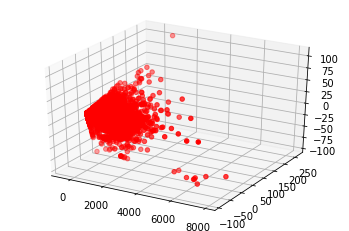


Variance: 
222175.60581090036
Projected Variance: 
222137.98704133037
Mean Squared Error: 
37.618769569991855


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('./OnlineNewsPopularity.csv')
data = data.drop(data.columns[[0,1,4,5,6,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,60]], axis=1)
means = np.mean(data, axis=0);
dHat = data - means
cov = np.dot(np.transpose(dHat),dHat)/data.shape[0]
var = 0;
for j in dHat.values:
  var+= np.dot(j.transpose(),j)
var = var/data.shape[0]

# Checking if eigenvalues and eigenvectors are correct
# a, b= np.linalg.eigh(cov)
# print(a)
# print(b)

np.random.seed(42)
X0 = np.random.random_sample((29,3))

Xiprev = np.dot(cov,X0)

projba = ((np.dot(np.transpose(Xiprev[:,1]), Xiprev[:,0]))/(np.dot(np.transpose(Xiprev[:,0]), Xiprev[:,0])))*Xiprev[:,0]
Xiprev[:,1] = Xiprev[:,1] - projba
projcb = ((np.dot(np.transpose(Xiprev[:,2]), Xiprev[:,1]))/(np.dot(np.transpose(Xiprev[:,1]),Xiprev[:,1])))*Xiprev[:,1]
projca = ((np.dot(np.transpose(Xiprev[:,2]), Xiprev[:,0]))/(np.dot(np.transpose(Xiprev[:,0]),Xiprev[:,0])))*Xiprev[:,0]
Xiprev[:,2] = Xiprev[:,2] - projcb - projca
Xiprev[:,0] = Xiprev[:,0]/np.linalg.norm(Xiprev[:,0])
Xiprev[:,1] = Xiprev[:,1]/np.linalg.norm(Xiprev[:,1])
Xiprev[:,2] = Xiprev[:,2]/np.linalg.norm(Xiprev[:,2])
while (1):
  Xi = np.dot(cov,Xiprev)
  projba = ((np.dot(np.transpose(Xi[:,1]), Xi[:,0]))/(np.dot(np.transpose(Xi[:,0]), Xi[:,0])))*Xi[:,0]
  Xi[:,1] = Xi[:,1] - projba
  projcb = ((np.dot(np.transpose(Xi[:,2]), Xi[:,1]))/(np.dot(np.transpose(Xi[:,1]),Xi[:,1])))*Xi[:,1]
  projca = ((np.dot(np.transpose(Xi[:,2]), Xi[:,0]))/(np.dot(np.transpose(Xi[:,0]),Xi[:,0])))*Xi[:,0]
  Xi[:,2] = Xi[:,2] - projcb - projca
  
  Xi[:,0] = Xi[:,0]/np.linalg.norm(Xi[:,0])
  Xi[:,1] = Xi[:,1]/np.linalg.norm(Xi[:,1])
  Xi[:,2] = Xi[:,2]/np.linalg.norm(Xi[:,2])

  if (np.linalg.norm((Xi-Xiprev))<.000001):
    break
  Xiprev = Xi

print("Eigenvectors: ")
print(Xi[:,0])
print(Xi[:,1])
print(Xi[:,2])
print()

print("EigenValues: ")
lambda1 = np.dot(np.dot(cov,Xi[:,0]), Xi[:,0].transpose())/np.dot(Xi[:,0],Xi[:,0].transpose())
print(lambda1)
lambda2 = np.dot(np.dot(cov,Xi[:,1]), Xi[:,1].transpose())/np.dot(Xi[:,1],Xi[:,1].transpose())
print(lambda2)
lambda3 = np.dot(np.dot(cov,Xi[:,2]), Xi[:,2].transpose())/np.dot(Xi[:,2],Xi[:,2].transpose())
print(lambda3)
print()

print("Centered Data Projected Onto Eigenvectors")
Dprime = np.dot(dHat,Xi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Dprime[:,0],Dprime[:,1],Dprime[:,2], color = 'red')
plt.show()
print()

projvar = lambda1+lambda2+lambda3
print('Variance: ')
print(var)
print('Projected Variance: ')
print(projvar)
print('Mean Squared Error: ')
print(var-projvar)


#Part 2: Points in High Dimensional Space

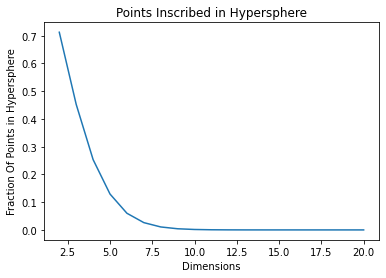

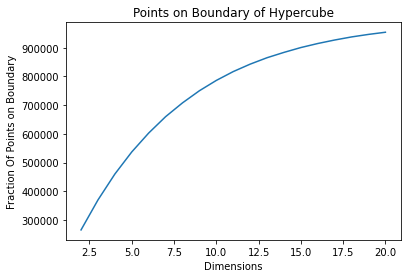

In [3]:
import matplotlib.pyplot as plt
np.random.seed(42)

dim = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
fracPoints = []
fracPointsInHyperCube=[]
d =  2
e = .1
while d<21:
  arr = 2.1 * np.random.random_sample((1000000,d)) + -1
  numpoints = 0
  pointsInHyperCube = 0
  for i in arr:
    if np.linalg.norm(i)<=1:
      numpoints+=1;
    for num in i:
      if num>=1-e or num<=-1+e:
        pointsInHyperCube+=1
        break
  fracPointsInSphere = numpoints/1000000
  hyperCubePointsFrac = pointsInHyperCube/1000000
  fracPoints.append(fracPointsInSphere)
  fracPointsInHyperCube.append(pointsInHyperCube)
  d+=1

plt.plot(dim,fracPoints)
plt.title('Points Inscribed in Hypersphere')
plt.xlabel('Dimensions')
plt.ylabel('Fraction Of Points in Hypersphere')
plt.show()

plt.plot(dim,fracPointsInHyperCube)
plt.title('Points on Boundary of Hypercube')
plt.xlabel('Dimensions')
plt.ylabel('Fraction Of Points on Boundary')
plt.show()



##HyperSphere Trend
We see the trend where the number of points in the inscribed hypersphere decreases as we increase the dimensions before it reaches a point where no points are in the inscribed hypersphere. This makes sense however, since as you increase the amount of dimensions that you have, the inscribed hypersphere gets smaller and smaller to the point where all the points are going to be outside the hypersphere. 
##HyperCube Boundary Trend
We see the trend where as you increase the dimensions, more and more points find themselves on the boundary until you reach the point where all the points are on the boundary. This makes sense because as you increase the dimensions the volume of the inner hypercube gets smaller and smaller since it would be .9 to the d power but the volume of the boundary would be 1 minus that value. If the boundary volume continually increases most of the points will be on the boundary. 